Fonte oficial do dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

Arquivos incluídos no link acima:
- **bank.csv**: uma versão reduzida do conjunto de dados
- **bank-full.csv**: o conjunto completo
- **bank-names.txt**: com a descrição dos campos do conjunto de dados

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import statsmodels.formula.api as smf

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [ ]:
print(X.shape)
print(y.shape)

(45211, 16)
(45211, 1)


In [ ]:
df = pd.concat([X, y], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [ ]:
bank_marketing.variables['description'].values

array([None,
       "type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",
       "marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",
       "(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",
       'has credit in default?', 'average yearly balance',
       'has housing loan?', 'has personal loan?',
       "contact communication type (categorical: 'cellular','telephone') ",
       'last contact day of the week',
       "last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')",
       " last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the

- `name`
- `age`
- `job`: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- `marital`: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- `education`: (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- `default`: has credit in default?
- `balance`: average yearly balance
- `housing`: has housing loan?
- `loan`: has personal loan?
- `contact`: contact communication type (categorical: 'cellular', 'telephone')
- `day_of_week`: last contact day of the week
- `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `duration`: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- `previous`: number of contacts performed before this campaign and for this client
- `poutcome`: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
- `y`: has the client subscribed a term deposit?

1. Which profession is most likely to take out a loan? Which type?

In [ ]:
df['housing'] = df['housing'] == 'yes'
df['personal'] = df['loan'] == 'yes'
df['housing_or_personal'] = df['housing'] | df['personal']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,personal,housing_or_personal
0,58,management,married,tertiary,no,2143,True,no,NaN,5,may,261,1,-1,0,NaN,no,False,True
1,44,technician,single,secondary,no,29,True,no,NaN,5,may,151,1,-1,0,NaN,no,False,True
2,33,entrepreneur,married,secondary,no,2,True,yes,NaN,5,may,76,1,-1,0,NaN,no,True,True
3,47,blue-collar,married,NaN,no,1506,True,no,NaN,5,may,92,1,-1,0,NaN,no,False,True
4,33,NaN,single,NaN,no,1,False,no,NaN,5,may,198,1,-1,0,NaN,no,False,False


In [ ]:
df.groupby('job').agg({'housing': 'mean', 'personal': 'mean', 'housing_or_personal': 'mean'})\
    .sort_values('housing_or_personal', ascending=False)

,housing,personal,housing_or_personal
job,,,
blue-collar,0.724209,0.173037,0.780826
services,0.665864,0.201252,0.737362
admin.,0.615355,0.191646,0.690195
entrepreneur,0.584398,0.239408,0.683255
technician,0.541661,0.172305,0.606555
management,0.494608,0.132480,0.552442
self-employed,0.484484,0.145028,0.547182
unemployed,0.416731,0.083653,0.452034
housemaid,0.320968,0.122581,0.395161


* housing = 72%
* personal = 17%
* h or p = 78%
* h or p = housing + personal - h and p
* 78% = 72% + 17% - h and p
* h and p = 72% + 17% - 78% = 11%
* (h or p)^c = 100% - 78% = 22%



2. Making a relationship between the number of contacts and campaign success, what are the relevant points to observe?

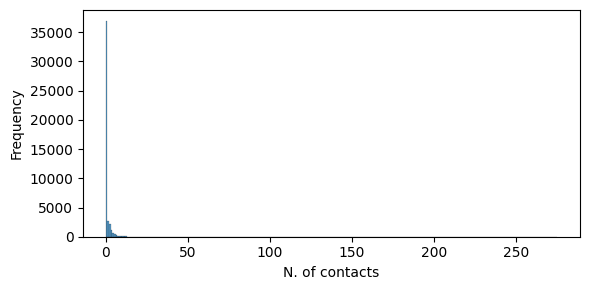

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.histplot(data=X, x='previous', binwidth=1, ax=ax)
ax.set_xlabel('N. of contacts')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['poutcome_success'] = df['poutcome'] == 'success'
df['previous_trimmed'] = np.where(df['previous'] < 15, df['previous'], '15 or more')

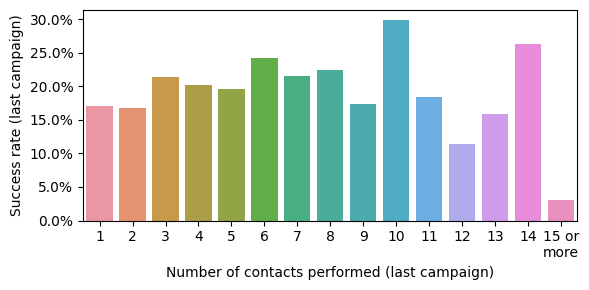

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

n_contacts_categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15 or more']

success_by_n_contacts = df.groupby('previous_trimmed')['poutcome_success'].mean().to_frame().reset_index()
success_by_n_contacts['previous_trimmed'] = pd.Categorical(success_by_n_contacts['previous_trimmed'],
                                                           ordered=True, categories=n_contacts_categories)

success_by_n_contacts['previous_trimmed'] = success_by_n_contacts['previous_trimmed'].replace({'15 or more': '15 or\nmore'})

sns.barplot(data=success_by_n_contacts, x='previous_trimmed', y='poutcome_success', ax=ax)

ax.set_xlabel('Number of contacts performed (last campaign)')
ax.set_ylabel('Success rate (last campaign)')

ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

In [ ]:
df['outcome_success'] = df['y'] == 'yes'
df['campaign_trimmed'] = np.where(df['campaign'] < 15, df['campaign'], '15 or more')

In [ ]:
df['campaign_trimmed'].value_counts()

1             17544
2             12505
3              5521
4              3522
5              1764
6              1291
7               735
15 or more      614
8               540
9               327
10              266
11              201
12              155
13              133
14               93
Name: campaign_trimmed, dtype: int64

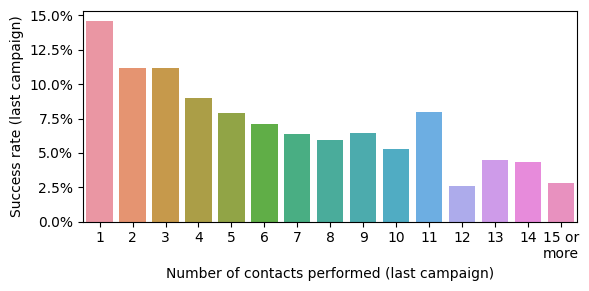

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

n_contacts_categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15 or more']

success_by_n_contacts = df.groupby('campaign_trimmed')['outcome_success'].mean().to_frame().reset_index()
success_by_n_contacts['campaign_trimmed'] = pd.Categorical(success_by_n_contacts['campaign_trimmed'],
                                                           ordered=True, categories=n_contacts_categories)

success_by_n_contacts['campaign_trimmed'] = success_by_n_contacts['campaign_trimmed'].replace({'15 or more': '15 or\nmore'})

sns.barplot(data=success_by_n_contacts, x='campaign_trimmed', y='outcome_success', ax=ax)

ax.set_xlabel('Number of contacts performed (last campaign)')
ax.set_ylabel('Success rate (last campaign)')

ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

In [ ]:
df['campaign_trimmed'].value_counts()

1             17544
2             12505
3              5521
4              3522
5              1764
6              1291
7               735
15 or more      614
8               540
9               327
10              266
11              201
12              155
13              133
14               93
Name: campaign_trimmed, dtype: int64

3. Based on the adherence results of this campaign, what is the average and maximum number of calls that you recommend to optimize adherence?

4. Is the result of the previous campaign relevant to the current campaign?

In [ ]:
df[['poutcome', 'y']].value_counts().sort_index()

poutcome  y  
failure   no     4283
          yes     618
other     no     1533
          yes     307
success   no      533
          yes     978
dtype: int64

In [ ]:
df['y_yes'] = df['y'] == 'yes'

In [ ]:
df[df['y_yes']].poutcome.value_counts() / df[df['y_yes']].poutcome.value_counts().sum()

success    0.513925
failure    0.324750
other      0.161324
Name: poutcome, dtype: float64

In [ ]:
df.groupby('poutcome')['y_yes'].mean()

poutcome
failure    0.126097
other      0.166848
success    0.647253
Name: y_yes, dtype: float64

5. What is the determining factor for the bank to require credit insurance?

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'personal', 'housing_or_personal',
       'poutcome_success', 'previous_trimmed', 'outcome_success',
       'campaign_trimmed', 'y_yes'],
      dtype='object')

In [ ]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
df['default_num'] = 1 * (df['default'] == 'yes')

In [ ]:
log_reg = smf.logit(formula='default_num ~ age + job + marital + balance + housing + loan + contact', data=df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.069910
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:            default_num   No. Observations:                32014
Model:                          Logit   Df Residuals:                    31996
Method:                           MLE   Df Model:                           17
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.1658
Time:                        21:54:14   Log-Likelihood:                -2238.1
converged:                       True   LL-Null:                       -2682.8
Covariance Type:            nonrobust   LLR p-value:                3.933e-178
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.6775      0.323    -11.388      0.000      -4.310      -3.04

6. What are the prominent characteristics of a customer who has a housing loan?

<Axes: xlabel='age'>

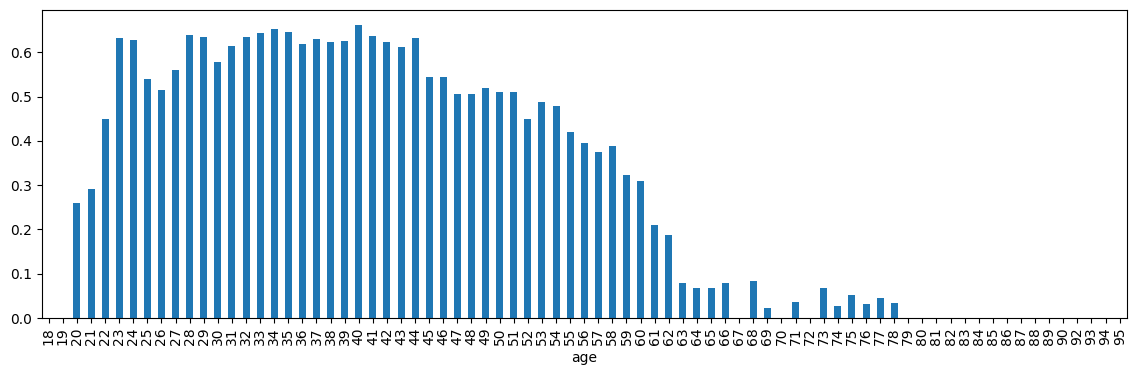

In [ ]:
df.groupby('age')['housing'].mean().plot(kind='bar', figsize=(14, 4))

In [ ]:
df['age_gr_or_eq_35'] = df['age'] >= 35

In [ ]:
np.sum(df['balance'] == 0)

3514

In [ ]:
np.sum(df['balance'] != 0)

41697

<Axes: xlabel='balance_round_1k'>

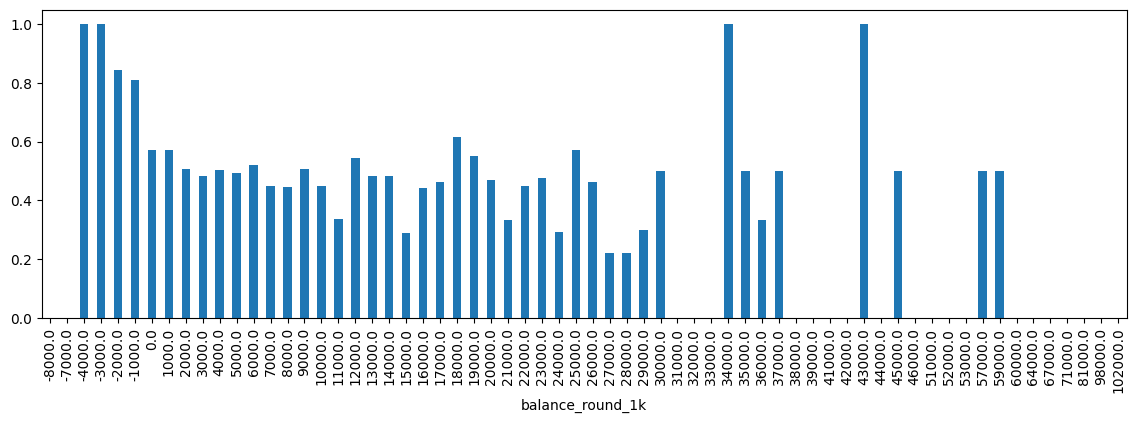

In [ ]:
df['balance_round_1k'] = np.round(df['balance'] / 1000) * 1000
df.groupby('balance_round_1k')['housing'].mean().plot(kind='bar', figsize=(14, 4))

In [ ]:
df['balance_lr_0'] = df['balance'] < 0

In [ ]:
df['housing_num'] = 1 * df['housing']

log_reg = smf.logit(formula='housing_num ~ age*age_gr_or_eq_35 + job + marital + balance*balance_lr_0 + contact', data=df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.632500
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            housing_num   No. Observations:                32014
Model:                          Logit   Df Residuals:                    31994
Method:                           MLE   Df Model:                           19
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.08734
Time:                        22:14:53   Log-Likelihood:                -20249.
converged:                       True   LL-Null:                       -22187.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9185      0.227     -4.040      0.000

Some characteristics that are generally linked to having a housing loan are:
- blue-collar professionals, followed by workers in the service field;
- divorced people (the reference group for the `marital` feature);
- people aged around 35;
- people whose contact was made via cell phone (the reference group for the `contact` feature);
- people whose average yearly balance is negative